In [1]:
#importing libraries to be in used
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
incident=pd.read_csv("E:\\Excel R\\Project Servicenow\\train.csv\\train.csv")

In [3]:
incident.replace('?', np.nan,inplace=True)

In [4]:
#Calculating missing values
incident.isna().sum()

Unnamed: 0                0
ID                        0
ID_status                 0
active                    0
count_reassign            0
count_opening             0
count_updated             0
ID_caller                22
opened_by              3328
opened_time               0
Created_by            37174
created_at            37174
updated_by                0
updated_at                0
type_contact              0
location                 54
category_ID              56
user_symptom          23139
Support_group          9994
support_incharge      19302
Doc_knowledge             0
confirmation_check        0
impact                    0
notify                    0
problem_ID            97620
change_request        98512
dtype: int64

## Label Encoding

In [5]:
cat_new=incident.select_dtypes(include=object)

In [6]:
cat_new.columns

Index(['ID', 'ID_status', 'ID_caller', 'opened_by', 'opened_time',
       'Created_by', 'created_at', 'updated_by', 'updated_at', 'type_contact',
       'location', 'category_ID', 'user_symptom', 'Support_group',
       'support_incharge', 'impact', 'notify', 'problem_ID', 'change_request'],
      dtype='object')

In [7]:
#Dropping features having significant missing values
cat_new.drop(["opened_time","created_at","updated_at","problem_ID", "change_request","problem_ID", "change_request"],axis=1,inplace=True)

C:\Users\sedulous\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
cat_new.drop(["Created_by"],axis=1,inplace=True)

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

In [10]:
label=LabelEncoder()

In [11]:
df_temp = cat_new.astype("str").apply(LabelEncoder().fit_transform)

In [12]:
df_final = df_temp.where(~cat_new.isna(), cat_new)

In [13]:
df_final.columns

Index(['ID', 'ID_status', 'ID_caller', 'opened_by', 'updated_by',
       'type_contact', 'location', 'category_ID', 'user_symptom',
       'Support_group', 'support_incharge', 'impact', 'notify'],
      dtype='object')

In [14]:
df_final.isna().sum()

ID                      0
ID_status               0
ID_caller              22
opened_by            3328
updated_by              0
type_contact            0
location               54
category_ID            56
user_symptom        23139
Support_group        9994
support_incharge    19302
impact                  0
notify                  0
dtype: int64

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 13 columns):
ID                  99198 non-null int64
ID_status           99198 non-null int64
ID_caller           99176 non-null object
opened_by           95870 non-null object
updated_by          99198 non-null int64
type_contact        99198 non-null int64
location            99144 non-null object
category_ID         99142 non-null object
user_symptom        76059 non-null object
Support_group       89204 non-null object
support_incharge    79896 non-null object
impact              99198 non-null int64
notify              99198 non-null int64
dtypes: int64(6), object(7)
memory usage: 9.8+ MB


In [2]:
#Imputation using knn or randomforest regressor

In [16]:
df_final.dropna(subset=['category_ID','ID_caller','location'],inplace=True)

In [17]:
nonull=df_final[pd.isnull(df_final['opened_by'])==False]

In [18]:
null=df_final[pd.isnull(df_final['opened_by'])]

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
knn_model= KNeighborsRegressor()

In [21]:
independent_var=['ID', 'ID_status', 'ID_caller', 'updated_by',
       'type_contact', 'location', 'category_ID','impact', 'notify']

In [22]:
knn_model.fit(nonull[independent_var],nonull['opened_by'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [23]:
prediction=knn_model.predict(X=null[independent_var])

In [24]:
type(prediction)

numpy.ndarray

In [25]:
null['opened_by']=prediction.astype(int)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 1365 to 63641
Data columns (total 13 columns):
ID                  3309 non-null int64
ID_status           3309 non-null int64
ID_caller           3309 non-null object
opened_by           3309 non-null int32
updated_by          3309 non-null int64
type_contact        3309 non-null int64
location            3309 non-null object
category_ID         3309 non-null object
user_symptom        2376 non-null object
Support_group       2709 non-null object
support_incharge    2652 non-null object
impact              3309 non-null int64
notify              3309 non-null int64
dtypes: int32(1), int64(6), object(6)
memory usage: 349.0+ KB


In [27]:
data=nonull.append(null)

In [28]:
data.columns

Index(['ID', 'ID_status', 'ID_caller', 'opened_by', 'updated_by',
       'type_contact', 'location', 'category_ID', 'user_symptom',
       'Support_group', 'support_incharge', 'impact', 'notify'],
      dtype='object')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99098 entries, 0 to 63641
Data columns (total 13 columns):
ID                  99098 non-null int64
ID_status           99098 non-null int64
ID_caller           99098 non-null object
opened_by           99098 non-null object
updated_by          99098 non-null int64
type_contact        99098 non-null int64
location            99098 non-null object
category_ID         99098 non-null object
user_symptom        76038 non-null object
Support_group       89154 non-null object
support_incharge    79864 non-null object
impact              99098 non-null int64
notify              99098 non-null int64
dtypes: int64(6), object(7)
memory usage: 10.6+ MB


In [30]:
nonull_1=data[pd.isnull(data['Support_group'])==False]

In [31]:
null_1=data[pd.isnull(data['Support_group'])]

In [32]:
independent_var=['ID', 'ID_status', 'ID_caller', 'updated_by',
       'type_contact', 'location', 'category_ID','impact', 'notify','opened_by']

In [33]:
knn_model.fit(nonull_1[independent_var],nonull_1['Support_group'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [34]:
prediction_1=knn_model.predict(X=null_1[independent_var])

In [35]:
null_1['Support_group']=prediction_1.astype(int)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
data_1=nonull_1.append(null_1)

In [37]:
nonull_2=data_1[pd.isnull(data_1['user_symptom'])==False]

In [38]:
null_2=data_1[pd.isnull(data_1['user_symptom'])]

In [39]:
independent_var=['ID', 'ID_status', 'ID_caller', 'updated_by',
       'type_contact', 'location', 'category_ID','impact', 'notify','opened_by','Support_group']

In [40]:
knn_model.fit(nonull_2[independent_var],nonull_2['user_symptom'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [41]:
prediction_2=knn_model.predict(X=null_2[independent_var])

In [42]:
null_2['user_symptom']=prediction_2.astype(int)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
nonull_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76038 entries, 0 to 63641
Data columns (total 13 columns):
ID                  76038 non-null int64
ID_status           76038 non-null int64
ID_caller           76038 non-null object
opened_by           76038 non-null object
updated_by          76038 non-null int64
type_contact        76038 non-null int64
location            76038 non-null object
category_ID         76038 non-null object
user_symptom        76038 non-null object
Support_group       76038 non-null object
support_incharge    61692 non-null object
impact              76038 non-null int64
notify              76038 non-null int64
dtypes: int64(6), object(7)
memory usage: 8.1+ MB


In [44]:
data_2=nonull_2.append(null_2)

In [45]:
data_2.isna().sum()

ID                      0
ID_status               0
ID_caller               0
opened_by               0
updated_by              0
type_contact            0
location                0
category_ID             0
user_symptom            0
Support_group           0
support_incharge    19234
impact                  0
notify                  0
dtype: int64

In [46]:
independent_var=['ID', 'ID_status', 'ID_caller', 'updated_by',
       'type_contact', 'location', 'category_ID','impact', 'notify','opened_by','Support_group','user_symptom']

In [47]:
nonull_3=data_2[pd.isnull(data_2['support_incharge'])==False]

In [48]:
null_3=data_2[pd.isnull(data_2['support_incharge'])]

In [49]:
knn_model.fit(nonull_3[independent_var],nonull_3['support_incharge'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [50]:
prediction_3=knn_model.predict(X=null_3[independent_var])

In [51]:
null_3['support_incharge']=prediction_3.astype(int)

C:\Users\sedulous\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
Imputated_data=nonull_3.append(null_3)

In [53]:
Imputated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99098 entries, 3 to 58285
Data columns (total 13 columns):
ID                  99098 non-null int64
ID_status           99098 non-null int64
ID_caller           99098 non-null object
opened_by           99098 non-null object
updated_by          99098 non-null int64
type_contact        99098 non-null int64
location            99098 non-null object
category_ID         99098 non-null object
user_symptom        99098 non-null object
Support_group       99098 non-null object
support_incharge    99098 non-null object
impact              99098 non-null int64
notify              99098 non-null int64
dtypes: int64(6), object(7)
memory usage: 10.6+ MB


In [54]:
def score_to_numeric(x):
    if x=='True':
        return 1
    else:
        return 0

In [55]:
incident.columns

Index(['Unnamed: 0', 'ID', 'ID_status', 'active', 'count_reassign',
       'count_opening', 'count_updated', 'ID_caller', 'opened_by',
       'opened_time', 'Created_by', 'created_at', 'updated_by', 'updated_at',
       'type_contact', 'location', 'category_ID', 'user_symptom',
       'Support_group', 'support_incharge', 'Doc_knowledge',
       'confirmation_check', 'impact', 'notify', 'problem_ID',
       'change_request'],
      dtype='object')

In [56]:
incident['Doc_knowledge'] = incident['Doc_knowledge'].apply(score_to_numeric)

In [57]:
incident['confirmation_check'] = incident['confirmation_check'].apply(score_to_numeric)

In [58]:
incident['active'] = incident['active'].apply(score_to_numeric)

In [59]:
incident

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,...,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,1,INC0000045,New,0,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,NaN,0,0,2 - Medium,Do Not Notify,NaN,NaN
1,3,INC0000045,Resolved,0,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,NaN,0,0,2 - Medium,Do Not Notify,NaN,NaN
2,4,INC0000045,Closed,0,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,NaN,0,0,2 - Medium,Do Not Notify,NaN,NaN
3,6,INC0000047,Active,0,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,0,0,2 - Medium,Do Not Notify,NaN,NaN
4,7,INC0000047,Active,0,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,0,0,2 - Medium,Do Not Notify,NaN,NaN
5,9,INC0000047,Active,0,1,0,4,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,0,0,2 - Medium,Do Not Notify,NaN,NaN
6,10,INC0000047,Active,0,1,0,5,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,0,0,2 - Medium,Do Not Notify,NaN,NaN
7,11,INC0000047,Awaiting User Info,0,1,0,6,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 89,0,0,2 - Medium,Do Not Notify,NaN,NaN
8,13,INC0000047,Closed,0,1,0,8,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 89,0,0,2 - Medium,Do Not Notify,NaN,NaN
9,14,INC0000057,New,0,0,0,0,Caller 4416,Opened by 8,29-02-2016 06:10,...,Category 20,Symptom 471,Group 70,NaN,0,0,2 - Medium,Do Not Notify,NaN,NaN


In [60]:
new = incident.filter(['active','count_reassign','count_opening','count_updated','Doc_knowledge','confirmation_check'], axis=1)

In [61]:
new.head(5)

,active,count_reassign,count_opening,count_updated,Doc_knowledge,confirmation_check
0,0,0,0,0,0,0
1,0,0,0,3,0,0
2,0,0,0,4,0,0
3,0,1,0,1,0,0
4,0,1,0,2,0,0


In [62]:
df=pd.concat([new,Imputated_data],axis=1)

In [63]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99198 entries, 0 to 99197
Data columns (total 19 columns):
active                99198 non-null int64
count_reassign        99198 non-null int64
count_opening         99198 non-null int64
count_updated         99198 non-null int64
Doc_knowledge         99198 non-null int64
confirmation_check    99198 non-null int64
ID                    99098 non-null float64
ID_status             99098 non-null float64
ID_caller             99098 non-null object
opened_by             99098 non-null object
updated_by            99098 non-null float64
type_contact          99098 non-null float64
location              99098 non-null object
category_ID           99098 non-null object
user_symptom          99098 non-null object
Support_group         99098 non-null object
support_incharge      99098 non-null object
impact                99098 non-null float64
notify                99098 non-null float64
dtypes: float64(6), int64(6), object(7)
memory usage: 1

In [64]:
df.isna().sum()

active                  0
count_reassign          0
count_opening           0
count_updated           0
Doc_knowledge           0
confirmation_check      0
ID                    100
ID_status             100
ID_caller             100
opened_by             100
updated_by            100
type_contact          100
location              100
category_ID           100
user_symptom          100
Support_group         100
support_incharge      100
impact                100
notify                100
dtype: int64

In [65]:
df.dropna(subset=['category_ID'],inplace=True)

In [66]:
df.columns

Index(['active', 'count_reassign', 'count_opening', 'count_updated',
       'Doc_knowledge', 'confirmation_check', 'ID', 'ID_status', 'ID_caller',
       'opened_by', 'updated_by', 'type_contact', 'location', 'category_ID',
       'user_symptom', 'Support_group', 'support_incharge', 'impact',
       'notify'],
      dtype='object')

In [67]:
X=df.iloc[:,0:17].values

In [68]:
y = df.loc[:,'impact'].values

## Feature Selection 

In [69]:
from sklearn.ensemble import ExtraTreesClassifier

In [70]:
forest = ExtraTreesClassifier(n_estimators = 10,criterion ='entropy', max_features = 15)

In [71]:
forest.fit(X, y) 

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features=15,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [72]:
importances = forest.feature_importances_

In [73]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [74]:
import matplotlib.pyplot as plt

1. feature 9 (0.241353)
2. feature 6 (0.154634)
3. feature 13 (0.095640)
4. feature 12 (0.083685)
5. feature 8 (0.082633)
6. feature 16 (0.082550)
7. feature 15 (0.067431)
8. feature 14 (0.059068)
9. feature 1 (0.041900)
10. feature 3 (0.040383)
11. feature 10 (0.026882)
12. feature 7 (0.018040)
13. feature 2 (0.002968)
14. feature 11 (0.002831)
15. feature 5 (0.000000)
16. feature 4 (0.000000)
17. feature 0 (0.000000)


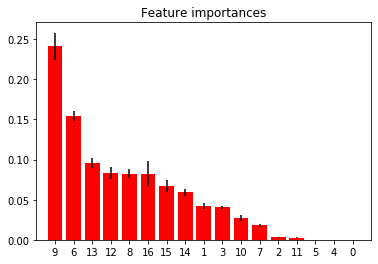

In [75]:
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [76]:
# Selecting important features 

In [77]:
df_train=df.filter(['count_reassign', 'count_updated', 'ID', 'ID_caller', 'opened_by', 'updated_by','location', 'category_ID','user_symptom', 'Support_group', 'support_incharge', 'impact'],axis=1)

In [78]:
df_train.head(5)

,count_reassign,count_updated,ID,ID_caller,opened_by,updated_by,location,category_ID,user_symptom,Support_group,support_incharge,impact
0,0,0,0.0,1455,200,94.0,43,44,491,46,166,1.0
1,0,3,0.0,1455,200,585.0,43,44,491,46,140,1.0
2,0,4,0.0,1455,200,681.0,43,44,491,46,124,1.0
3,1,1,1.0,1455,120,94.0,62,29,344,14,164,1.0
4,1,2,1.0,1455,120,94.0,62,29,344,14,164,1.0


In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99098 entries, 0 to 99197
Data columns (total 12 columns):
count_reassign      99098 non-null int64
count_updated       99098 non-null int64
ID                  99098 non-null float64
ID_caller           99098 non-null object
opened_by           99098 non-null object
updated_by          99098 non-null float64
location            99098 non-null object
category_ID         99098 non-null object
user_symptom        99098 non-null object
Support_group       99098 non-null object
support_incharge    99098 non-null object
impact              99098 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 9.8+ MB


## Spliting into train and test

In [80]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets

In [81]:
train_features, test_features, train_labels, test_labels = train_test_split(df_train.iloc[:,0:11], df_train['impact'], test_size = 0.30, random_state =0,stratify=df_train['impact'])

In [82]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69368 entries, 73303 to 20726
Data columns (total 11 columns):
count_reassign      69368 non-null int64
count_updated       69368 non-null int64
ID                  69368 non-null float64
ID_caller           69368 non-null object
opened_by           69368 non-null object
updated_by          69368 non-null float64
location            69368 non-null object
category_ID         69368 non-null object
user_symptom        69368 non-null object
Support_group       69368 non-null object
support_incharge    69368 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 6.4+ MB


In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()

In [85]:
print(scaler.fit(train_features))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [86]:
train_features_scalar=scaler.fit(train_features)

In [87]:
X=df_train.iloc[:,0:11].values

In [88]:
y=df_train.loc[:'impact'].values

## Model 1(Random Foreest Classifier)

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf_model = RandomForestClassifier()

In [93]:
rf_model.fit(train_features,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
rf_pred_test = rf_model.predict(test_features)

In [95]:
rf_pred_train=rf_model.predict(train_features)

In [96]:
from sklearn.metrics import roc_auc_score

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
import sklearn.metrics as metrics

In [99]:
print(metrics.classification_report(rf_pred_train, train_labels))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1706
         1.0       1.00      1.00      1.00     65762
         2.0       1.00      1.00      1.00      1900

    accuracy                           1.00     69368
   macro avg       1.00      1.00      1.00     69368
weighted avg       1.00      1.00      1.00     69368



In [101]:
rf_score_train=accuracy_score(train_labels, rf_pred_train)

In [102]:
rf_score_train

0.9999711682620228

In [103]:
rf_score_test=accuracy_score(test_labels, rf_pred_test)

In [104]:
rf_score_test

0.9802892700975445

In [105]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


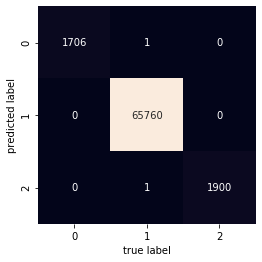

In [106]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(rf_pred_train, train_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [107]:
print(metrics.classification_report(rf_pred_test, test_labels))
# Low precision and high recall, need to improve precision as per business objective

              precision    recall  f1-score   support

         0.0       0.55      0.91      0.68       439
         1.0       1.00      0.98      0.99     28658
         2.0       0.75      0.96      0.84       633

    accuracy                           0.98     29730
   macro avg       0.76      0.95      0.84     29730
weighted avg       0.99      0.98      0.98     29730



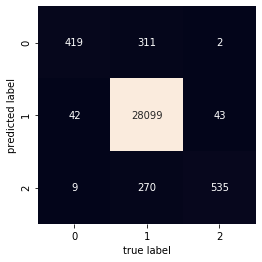

In [143]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(rf_pred_test, test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Model 2(Decision tree)

In [108]:
 from sklearn import tree

In [109]:
clf = tree.DecisionTreeClassifier()

In [110]:
clf = clf.fit(train_features, train_labels)

In [111]:
dtpred_train = clf.predict(train_features)

In [112]:
dtpred_test= clf.predict(test_features)

In [113]:
print(metrics.classification_report(dtpred_train, train_labels))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1707
         1.0       1.00      1.00      1.00     65760
         2.0       1.00      1.00      1.00      1901

    accuracy                           1.00     69368
   macro avg       1.00      1.00      1.00     69368
weighted avg       1.00      1.00      1.00     69368



In [114]:
score_train=accuracy_score(train_labels, dtpred_train)

In [115]:
score_train

1.0

In [116]:
print(metrics.classification_report(dtpred_test, test_labels))
# Better results as precision and recall for hig impact are more balaanced than random forest model

              precision    recall  f1-score   support

         0.0       0.73      0.66      0.70       808
         1.0       0.99      0.99      0.99     28078
         2.0       0.88      0.85      0.86       844

    accuracy                           0.98     29730
   macro avg       0.87      0.83      0.85     29730
weighted avg       0.98      0.98      0.98     29730



In [117]:
from sklearn.metrics import accuracy_score

In [118]:
score_test = accuracy_score(test_labels, dtpred_test)

In [119]:
score_test

0.9772956609485368

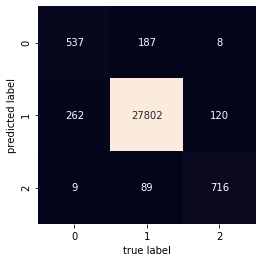

In [120]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(dtpred_test, test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Model 3(KNN )

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
neigh = KNeighborsClassifier(n_neighbors=4)

In [123]:
neigh.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [124]:
knnpred_train = neigh.predict(train_features)

In [125]:
print(metrics.classification_report(knnpred_train, train_labels))

              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      1882
         1.0       0.99      0.98      0.99     66397
         2.0       0.52      0.91      0.66      1089

    accuracy                           0.97     69368
   macro avg       0.76      0.86      0.79     69368
weighted avg       0.98      0.97      0.97     69368



In [126]:
knn_score_train = accuracy_score(train_labels, knnpred_train)

In [127]:
knn_score_train

0.9718458078652982

In [128]:
knnpred_test=neigh.predict(test_features)

In [129]:
print(metrics.classification_report(knnpred_test, test_labels))

              precision    recall  f1-score   support

         0.0       0.49      0.48      0.49       746
         1.0       0.98      0.97      0.98     28586
         2.0       0.38      0.78      0.51       398

    accuracy                           0.96     29730
   macro avg       0.62      0.74      0.66     29730
weighted avg       0.96      0.96      0.96     29730



In [130]:
knn_score_train = accuracy_score(test_labels, knnpred_test)

In [131]:
knn_score_train

0.9555331315169862

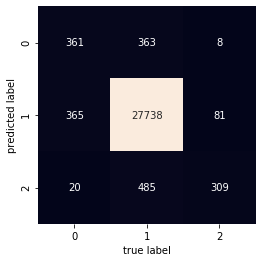

In [132]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(knnpred_test, test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');